In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("C:\\Users\\PMLS\\Downloads\\AI-Powered-Career-Recommendation-System\\Data\\AI-based Career Recommendation System.csv")

In [3]:
df.head()

,CandidateID,Name,Age,Education,Skills,Interests,Recommended_Career,Recommendation_Score
0,1,John Doe,28,Bachelor's,Python;Data Analysis;Machine Learning,Technology;Data Science,Data Scientist,0.95
1,2,Jane Smith,32,Master's,Java;System Design;Cloud Computing,Software Development;AI,Software Engineer,0.90
2,3,Bob Johnson,24,Bachelor's,Graphic Design;UI/UX;Adobe Creative Suite,Arts;Digital Media,UX Designer,0.88
3,4,Emily Davis,26,Bachelor's,Python;Deep Learning;Statistics,Healthcare;AI,AI Researcher,0.93
4,5,Michael Brown,30,Master's,Project Management;Communication;Agile,Business;Management,Project Manager,0.87


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CandidateID           200 non-null    int64  
 1   Name                  200 non-null    object 
 2   Age                   200 non-null    int64  
 3   Education             200 non-null    object 
 4   Skills                200 non-null    object 
 5   Interests             200 non-null    object 
 6   Recommended_Career    200 non-null    object 
 7   Recommendation_Score  200 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 12.6+ KB


In [5]:
df.shape

(200, 8)

In [6]:
df.isnull().sum()

CandidateID             0
Name                    0
Age                     0
Education               0
Skills                  0
Interests               0
Recommended_Career      0
Recommendation_Score    0
dtype: int64

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [8]:
df['Skills'] = df['Skills'].str.replace('\n', '').str.strip()
df['Interests'] = df['Interests'].str.replace('\n', '').str.strip()


In [9]:
df['Skills'] = df['Skills'].str.lower()
df['Interests'] = df['Interests'].str.lower()


In [10]:
df.drop(['CandidateID', 'Age'], axis=1, inplace=True)

In [11]:
def get_programming_score(skills):
    if any(skill in skills for skill in ['python', 'java', 'c++', 'programming', 'software', 'coding']):
        return np.random.randint(8, 10)
    elif any(skill in skills for skill in ['html', 'css', 'ui/ux', 'design', 'javascript']):
        return np.random.randint(5, 7)
    else:
        return np.random.randint(2, 4)

In [12]:
def get_logical_thinking_score(skills, interests):
    keywords = ['data analysis', 'ml', 'machine learning', 'deep learning', 'analytics', 'problem solving']
    if any(k in skills for k in keywords) or any(k in interests for k in keywords):
        return np.random.randint(8, 10)
    elif any(k in skills for k in ['design', 'project', 'ui/ux']) or any(k in interests for k in ['business', 'marketing']):
        return np.random.randint(5, 7)
    else:
        return np.random.randint(2, 4)


In [13]:
def get_math_score(skills, interests):
    keywords = ['statistics', 'machine learning', 'mathematics', 'data science', 'algebra']
    if any(k in skills for k in keywords) or any(k in interests for k in keywords):
        return np.random.randint(8, 10)
    elif any(k in skills for k in ['html', 'css', 'cloud']) or any(k in interests for k in ['management']):
        return np.random.randint(5, 7)
    else:
        return np.random.randint(2, 4)

In [14]:
def get_problem_solving_score(skills, interests):
    keywords = ['problem solving', 'ml', 'ai', 'analytics', 'debugging']
    if any(k in skills for k in keywords) or any(k in interests for k in keywords):
        return np.random.randint(8, 10)
    elif any(k in skills for k in ['python', 'cloud', 'software']) or any(k in interests for k in ['technology']):
        return np.random.randint(5, 7)
    else:
        return np.random.randint(2, 4)

In [15]:
df['programming_skills'] = df['Skills'].apply(get_programming_score)
df['logical_thinking'] = df.apply(lambda row: get_logical_thinking_score(row['Skills'], row['Interests']), axis=1)
df['math_score'] = df.apply(lambda row: get_math_score(row['Skills'], row['Interests']), axis=1)
df['problem_solving'] = df.apply(lambda row: get_problem_solving_score(row['Skills'], row['Interests']), axis=1)

In [16]:
df.head()

,Name,Education,Skills,Interests,Recommended_Career,Recommendation_Score,programming_skills,logical_thinking,math_score,problem_solving
0,John Doe,Bachelor's,python;data analysis;machine learning,technology;data science,Data Scientist,0.95,8,9,8,5
1,Jane Smith,Master's,java;system design;cloud computing,software development;ai,Software Engineer,0.90,9,5,5,9
2,Bob Johnson,Bachelor's,graphic design;ui/ux;adobe creative suite,arts;digital media,UX Designer,0.88,5,6,3,3
3,Emily Davis,Bachelor's,python;deep learning;statistics,healthcare;ai,AI Researcher,0.93,9,9,9,9
4,Michael Brown,Master's,project management;communication;agile,business;management,Project Manager,0.87,3,6,6,3


In [17]:
df[['Education', 'Skills', 'Interests', 'programming_skills', 'logical_thinking', 'math_score', 'problem_solving']].head(15)


,Education,Skills,Interests,programming_skills,logical_thinking,math_score,problem_solving
0,Bachelor's,python;data analysis;machine learning,technology;data science,8,9,8,5
1,Master's,java;system design;cloud computing,software development;ai,9,5,5,9
2,Bachelor's,graphic design;ui/ux;adobe creative suite,arts;digital media,5,6,3,3
3,Bachelor's,python;deep learning;statistics,healthcare;ai,9,9,9,9
4,Master's,project management;communication;agile,business;management,3,6,6,3
5,Bachelor's,c++;embedded systems;iot,electronics;automation,8,3,3,3
6,Master's,sql;data warehousing;etl,finance;analytics,2,8,3,8
7,Bachelor's,content writing;seo;social media,marketing;communications,3,6,3,3
8,Bachelor's,python;natural language processing;machine lea...,linguistics;technology,8,8,9,6
9,Master's,financial analysis;excel;econometrics,finance;data analysis,3,9,3,3


In [18]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


C:\Users\PMLS\AppData\Local\Temp\ipykernel_14992\4081658392.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Recommended_Career', order=df['Recommended_Career'].value_counts().index, palette='viridis')


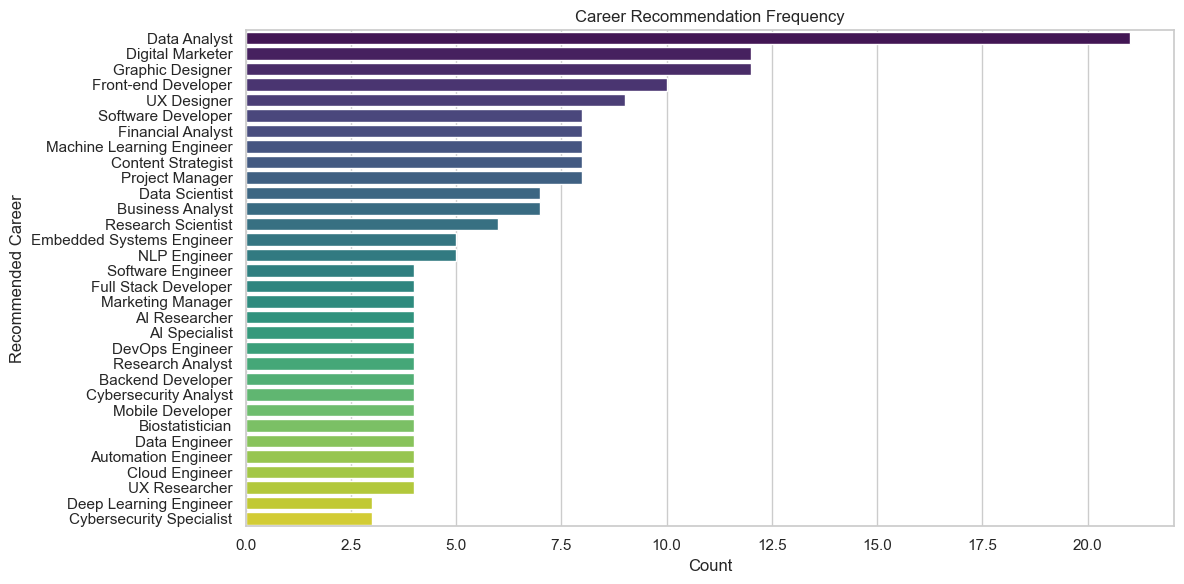

In [19]:
# 1. Distribution of Recommended Careers
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Recommended_Career', order=df['Recommended_Career'].value_counts().index, palette='viridis')
plt.title("Career Recommendation Frequency")
plt.xlabel("Count")
plt.ylabel("Recommended Career")
plt.tight_layout()
plt.show()

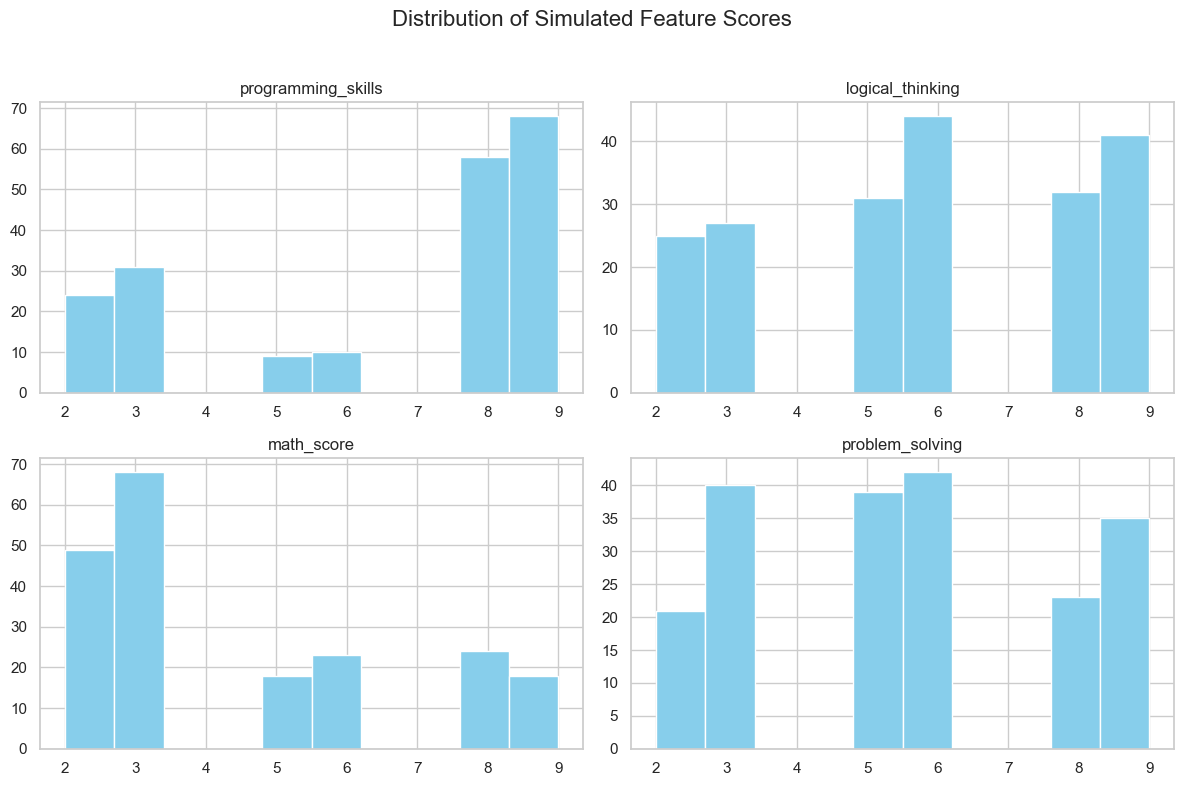

In [20]:
# 2. Histogram of simulated scores
score_columns = ['programming_skills', 'logical_thinking', 'math_score', 'problem_solving']
df[score_columns].hist(bins=10, figsize=(12, 8), layout=(2, 2), color='skyblue')
plt.suptitle("Distribution of Simulated Feature Scores", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


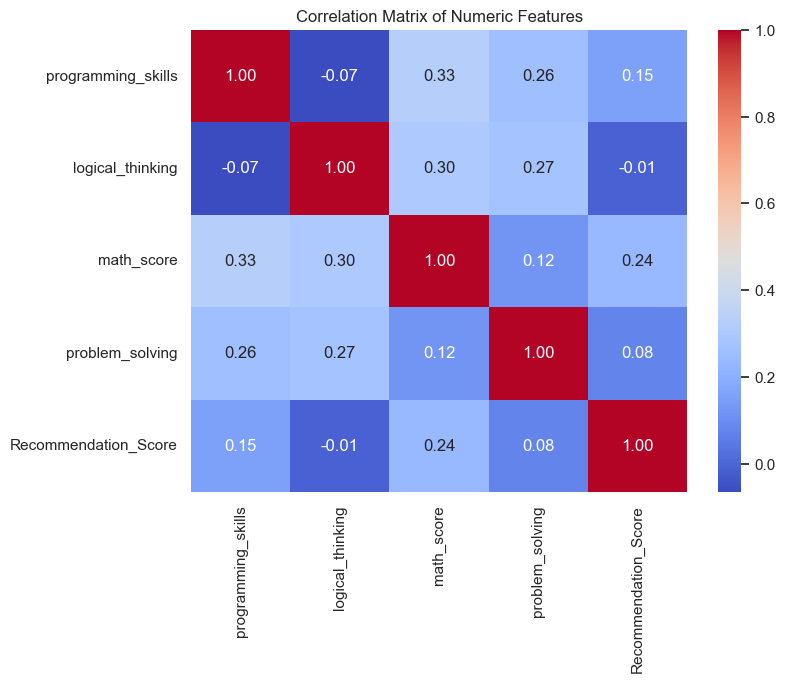

In [21]:

# 3. Correlation heatmap
numeric_features = df[score_columns + ['Recommendation_Score']]
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()
